<a href="https://colab.research.google.com/github/valdirdpg/curso-dnc/blob/master/Desafio_6_Churn_Streaming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Análise exploratória dos dados (Data Understanding)**

In [30]:
# Imports

import io
from google.colab import files
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier




In [15]:
def upload():
  uploaded = files.upload()
  for name, data in uploaded.items():
    with io.BytesIO(data) as f:
      return f

In [16]:
upload()

Saving streaming_data.csv to streaming_data (1).csv


In [17]:
data = pd.read_csv('/content/streaming_data.csv')

In [18]:
data.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,NaN,3,NaN,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,NaN,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,NaN,5.0,Basic,NaN,2,NaN,NaN,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
4,18.0,NaN,1948.0,3.0,Basic,NaN,3,3.88,0.0,14879bcb-1977-4ad8-a7f9-6aa9bf7b872f


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77884 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     66607 non-null  float64
 1   Gender                  63368 non-null  object 
 2   Time_on_platform        56464 non-null  float64
 3   Devices_connected       52696 non-null  float64
 4   Subscription_type       52663 non-null  object 
 5   Num_streaming_services  9572 non-null   float64
 6   Num_active_profiles     77884 non-null  int64  
 7   Avg_rating              60614 non-null  float64
 8   Churned                 61148 non-null  float64
 9   User_id                 77884 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.9+ MB


In [20]:
data.isna().sum()

Age                       11277
Gender                    14516
Time_on_platform          21420
Devices_connected         25188
Subscription_type         25221
Num_streaming_services    68312
Num_active_profiles           0
Avg_rating                17270
Churned                   16736
User_id                       0
dtype: int64

In [21]:
data.describe()

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Churned
count,66607.000000,56464.000000,52696.000000,9572.000000,77884.000000,60614.000000,61148.000000
mean,43.511072,4385.848505,2.995370,2.496239,3.002273,3.002252,0.243066
std,15.043158,2526.580859,1.414072,1.120700,1.413235,1.154963,0.428938
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,30.000000,2196.000000,2.000000,1.000000,2.000000,1.990000,0.000000
50%,43.000000,4384.000000,3.000000,2.000000,3.000000,3.010000,0.000000
75%,57.000000,6573.000000,4.000000,4.000000,4.000000,4.000000,0.000000
max,69.000000,8759.000000,5.000000,4.000000,5.000000,5.000000,1.000000


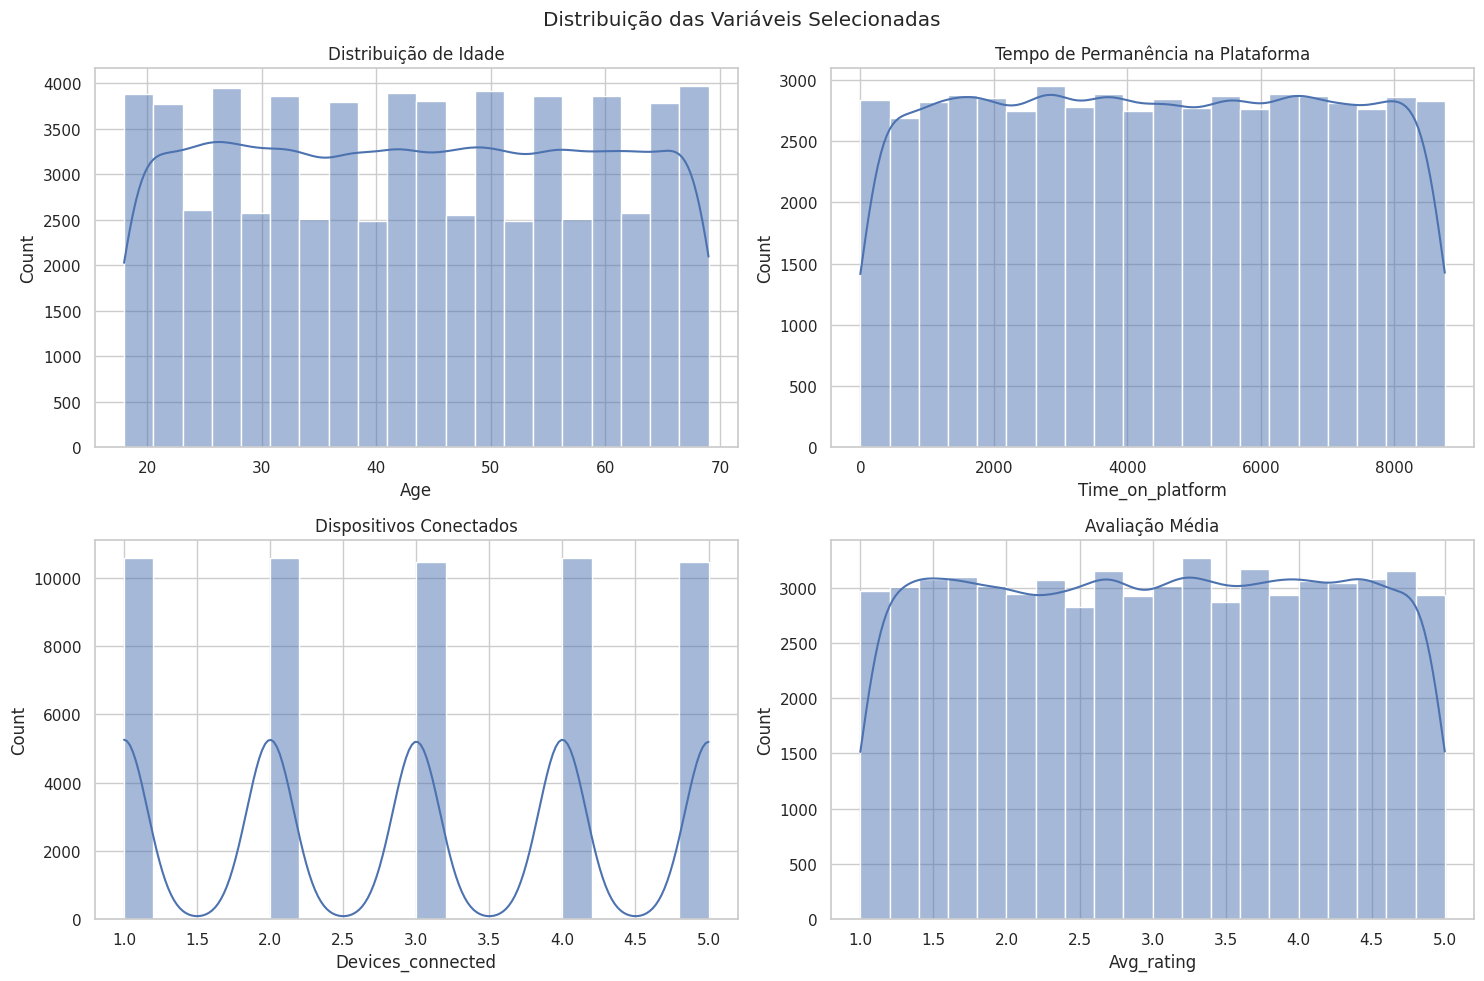

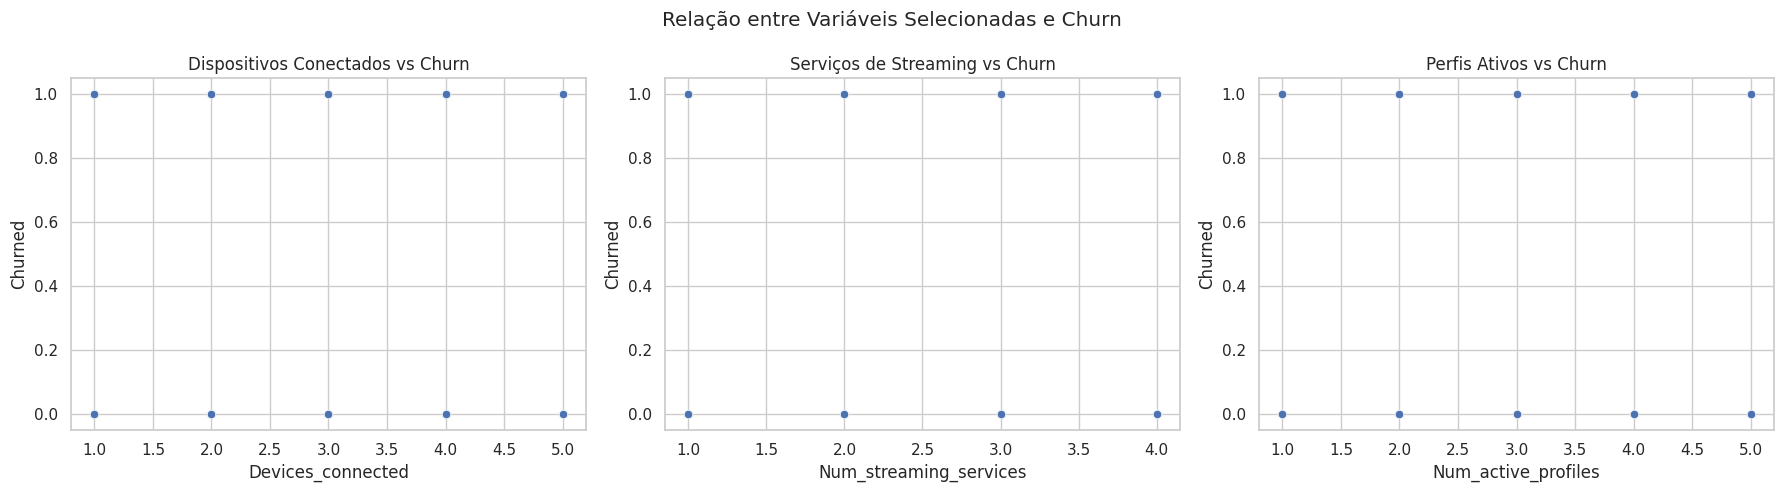

In [22]:
# Configurando o estilo do gráfico
sns.set(style="whitegrid")

# Criando histogramas para algumas variáveis selecionadas
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Distribuição das Variáveis Selecionadas')

sns.histplot(data['Age'], bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribuição de Idade')

sns.histplot(data['Time_on_platform'], bins=20, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Tempo de Permanência na Plataforma')

sns.histplot(data['Devices_connected'], bins=20, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Dispositivos Conectados')

sns.histplot(data['Avg_rating'], bins=20, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Avaliação Média')

plt.tight_layout()
plt.show()

# Criando gráficos de dispersão para explorar as relações entre variáveis
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Relação entre Variáveis Selecionadas e Churn')

sns.scatterplot(data=data, x='Devices_connected', y='Churned', ax=axes[0])
axes[0].set_title('Dispositivos Conectados vs Churn')

sns.scatterplot(data=data, x='Num_streaming_services', y='Churned', ax=axes[1])
axes[1].set_title('Serviços de Streaming vs Churn')

sns.scatterplot(data=data, x='Num_active_profiles', y='Churned', ax=axes[2])
axes[2].set_title('Perfis Ativos vs Churn')

plt.tight_layout()
plt.show()


A distribuição de idade dos usuários da plataforma abrange diversas faixas etárias. O tempo de permanência na plataforma é variado, indicando diferentes graus de engajamento. Existe uma variação na quantidade de dispositivos conectados por usuário. A avaliação média é bem distribuida, se entendermos que  <= a 3 há de uma neutralidade a uma insatsfação, podemos afirmar que p´roximo de 50% das pessoas gostam e não gostam da plataforma.

Já com relação a correlação ente as variaveis selecionadas e o churn, pode se dizer que: a relação entre dispositivos conectados e churn sugere que maior engajamento pode reduzir o abandono da plataforma. A análise da variedade de serviços de streaming utilizados e o churn explora como a diversidade de opções afeta a fidelidade do usuário. O gráfico de perfis ativos X churn indica se usuários com mais perfis tendem a ser mais fiéis à plataforma.

#**Tratamento dos Dados (Data Preparation)**

In [23]:
# Substituir NaN por 0 nas colunas ime_on_platform, Num_streaming_services, Churned, Avg_rating, Devices_connected
columns_to_fill = ['Time_on_platform', 'Num_streaming_services', 'Churned', 'Avg_rating', 'Devices_connected']
data[columns_to_fill] = data[columns_to_fill].fillna(0)

# Remover linhas com valores nulos em Gender, Subscription_type e Age
data.dropna(subset=['Gender', 'Subscription_type', 'Age'], inplace=True)

# Transformar valores de Churned de 0 e 1 para 'No' e 'Yes'
data['Churned'] = data['Churned'].replace({0: 'No', 1: 'Yes'})

# Converter valores float para inteiros nas colunas apropriadas
float_columns = data.select_dtypes(include=['float64']).columns
data[float_columns] = data[float_columns].astype('int64')


data.head()


,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49,Male,4700,3,Basic,0,3,0,No,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69,Female,6107,2,Standard,0,1,2,No,fe14b048-770b-4619-8ec6-485b0969ae31
2,44,Male,6374,3,Premium,1,1,1,Yes,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26,Male,0,5,Basic,0,2,0,No,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
5,54,Male,3024,2,Basic,0,1,0,No,a1df3a13-9255-4d00-8a9d-20565fefaab9


#**Modelagem dos Dados - Regressão Logística**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


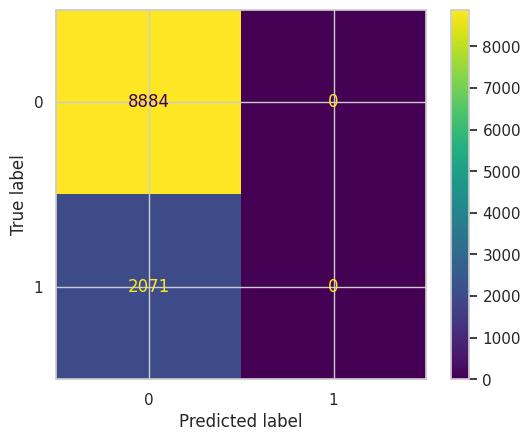


---------------------MÉTRICA DE DESEMPENHO-------------------------
              precision    recall  f1-score   support

           0       0.81      1.00      0.90      8884
           1       0.00      0.00      0.00      2071

    accuracy                           0.81     10955
   macro avg       0.41      0.50      0.45     10955
weighted avg       0.66      0.81      0.73     10955



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
# Simplificando o processo - Utilizando os dados originais com mínimas transformações
# Atualizando y para ser numérica (0 para 'No', 1 para 'Yes')
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['Churned'])

# Utilizando X sem transformações adicionais
X = data.drop(['Churned', 'User_id'], axis=1)

# Tratando variáveis categóricas com get_dummies
X = pd.get_dummies(X, drop_first=True)

# Separando os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Tentando novamente criar e treinar o modelo de Regressão Logística
try:
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Realizando a modelagem
    y_pred = model.predict(X_test)

    # Plotando a matriz de confusão
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.show()

    # Imprimindo métricas de desempenho
    print()
    print("---------------------MÉTRICA DE DESEMPENHO-------------------------")
    print(classification_report(y_test, y_pred))
except Exception as e:
    error_message = str(e)
    error_message



#**Modelagem dos Dados - Tunning**

Fitting 3 folds for each of 72 candidates, totalling 216 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


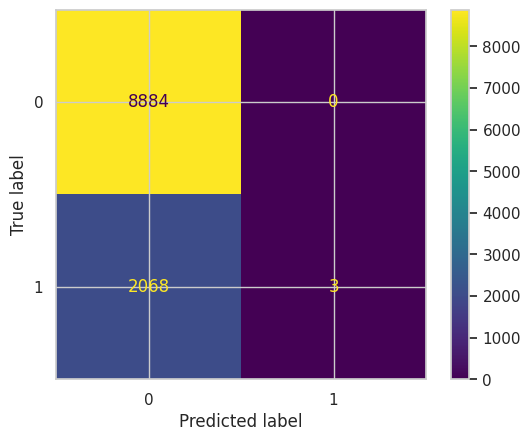

              precision    recall  f1-score   support

           0       0.81      1.00      0.90      8884
           1       1.00      0.00      0.00      2071

    accuracy                           0.81     10955
   macro avg       0.91      0.50      0.45     10955
weighted avg       0.85      0.81      0.73     10955



In [27]:
# Preparando o modelo de Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Montando o grid search
param_grid = {
    'n_estimators': [30, 70,100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 6, 8, 10],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Realizando o fit do modelo
grid_search.fit(X_train, y_train)

# Realizando o Tunning (selecionando o melhor estimador)
best_rf_model = grid_search.best_estimator_

# Realizando a modelagem com o modelo ajustado
y_pred_rf = best_rf_model.predict(X_test)

# Plotando a matriz de confusão
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=best_rf_model.classes_)
disp_rf.plot()
plt.show()

# Imprimindo métricas de desempenho
print(classification_report(y_test, y_pred_rf))


#**Modelagem dos Dados - Random Forest**

Fitting 3 folds for each of 72 candidates, totalling 216 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


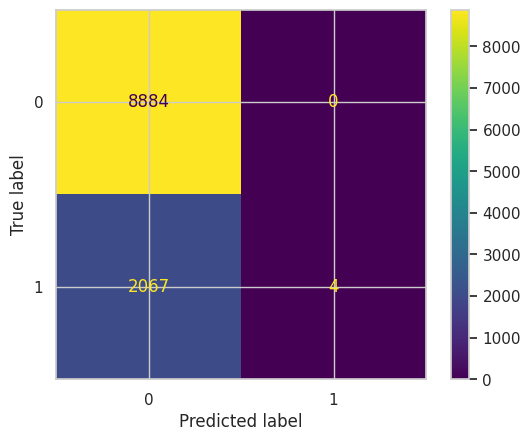

              precision    recall  f1-score   support

           0       0.81      1.00      0.90      8884
           1       1.00      0.00      0.00      2071

    accuracy                           0.81     10955
   macro avg       0.91      0.50      0.45     10955
weighted avg       0.85      0.81      0.73     10955



In [31]:
# Preparando o modelo de Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Montando o grid search
param_grid = {
    'n_estimators': [30, 70, 100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 6, 8, 10],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Realizando o fit do modelo
grid_search.fit(X_train, y_train)

# Realizando o Tunning (selecionando o melhor estimador)
best_rf_model = grid_search.best_estimator_

# Realizando a modelagem com o modelo ajustado
y_pred_rf = best_rf_model.predict(X_test)

# Plotando a matriz de confusão
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=best_rf_model.classes_)
disp_rf.plot()
plt.show()

# Imprimindo métricas de desempenho
print(classification_report(y_test, y_pred_rf))


Os modelos de Random Forest, mesmo ajustados ou não, têm precisão alta mas não identificam corretamente a classe 1. A Regressão Logística, mais consistente, também não é eficaz para a classe 1. Nenhum dos modelos apresenta grandes vantagens sobre o outro, todos precisam de melhorias para prever a classe 1 adequadamente, porém a regressão logística apresenta números ligeiramente melhores, mesmo que não tenha identificado nenhum FN e VN.






